In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('feature_evaluation_currency.csv')
df.head()

,Date,Canada,Switzerland,China,India,Japan
0,1960,0.969767,4.37295,2.461809,4.7619,360.0
1,1961,1.013063,4.37295,2.461809,4.7619,360.0
2,1962,1.068769,4.37295,2.461809,4.7619,360.0
3,1963,1.078514,4.37295,2.461809,4.7619,360.0
4,1964,1.078598,4.37295,2.461809,4.7619,360.0


In [20]:
print('Dimension:',df.shape)
print(df.describe())

Dimension: (60, 6)
              Date     Canada  Switzerland      China      India       Japan
count    60.000000  60.000000    60.000000  60.000000  60.000000   60.000000
mean   1989.500000   1.191735     2.150140   4.785323  27.105646  196.313722
std      17.464249   0.160852     1.250720   2.576132  21.181115  102.366678
min    1960.000000   0.969767     0.888042   1.498386   4.761900   79.790455
25%    1974.750000   1.068349     1.241624   2.461809   8.041939  110.371937
50%    1989.500000   1.168000     1.597266   4.274158  16.864500  136.335542
75%    2004.250000   1.307365     2.680775   6.918453  45.309373  293.200000
max    2019.000000   1.570343     4.372950   8.618743  70.420341  360.000000


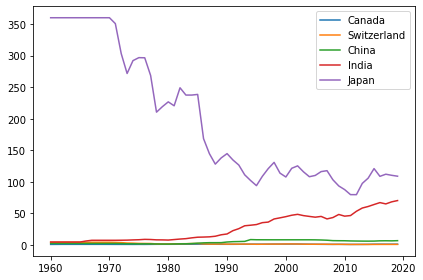

In [38]:
fig = plt.figure(figsize=(6,4))
plt.plot(df.Date,df.Canada,label="Canada")
plt.plot(df.Date,df.Switzerland,label="Switzerland")
plt.plot(df.Date,df.China,label="China")
plt.plot(df.Date,df.India,label="India")
plt.plot(df.Date,df.Japan,label="Japan")
plt.legend()
plt.tight_layout()

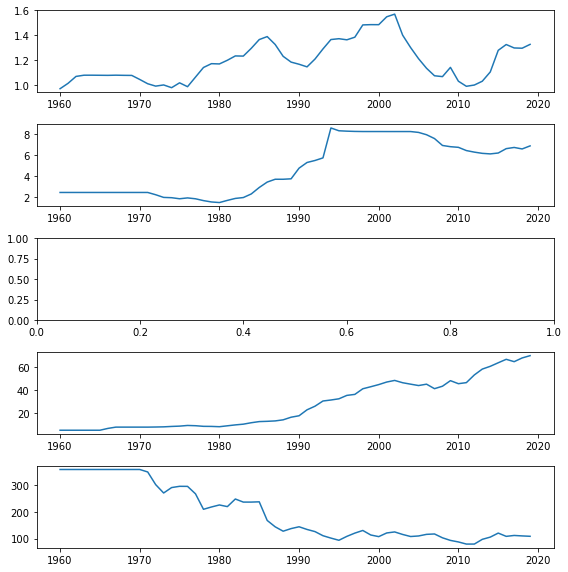

In [34]:
fig, ax = plt.subplots(5,1,figsize=(8,8))
ax[0].plot(df.Date,df.Canada)
ax[1].plot(df.Date,df.China)
ax[3].plot(df.Date,df.India)
ax[4].plot(df.Date,df.Japan)
plt.tight_layout()

C:\Users\Admin\anaconda3\envs\venv\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\envs\venv\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\envs\venv\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\envs\venv\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\envs\venv\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


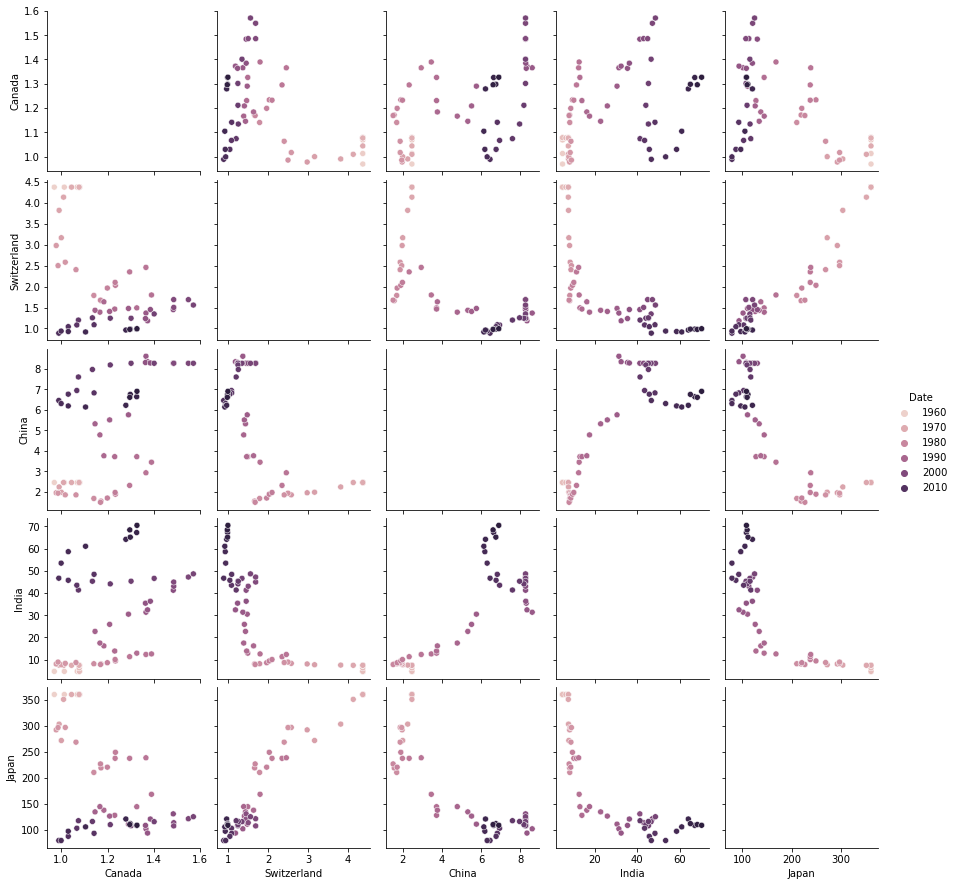

In [29]:
sns.pairplot(df, hue="Date")

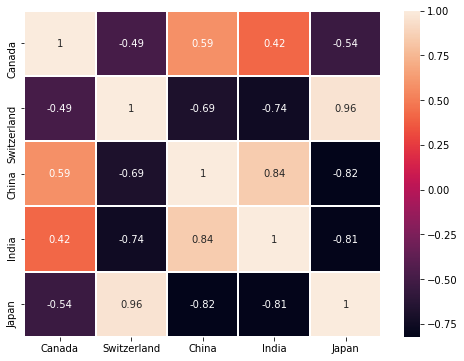

In [39]:
df1= df.drop("Date",axis=1)
fig=plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(),linewidths=1,annot=True)

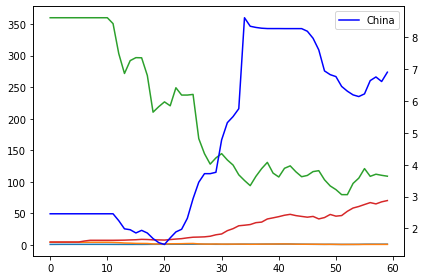

In [52]:
# Visualise data with other currencies
plt.figure(figsize=(6,4))
df['Canada'].plot()
df['Switzerland'].plot()
df['Japan'].plot()
df['India'].plot()
df['China'].plot(secondary_y=True, c='b')
plt.legend(loc='best')
plt.tight_layout()

**Exponentially Weighted Moving Average (EWMA)**

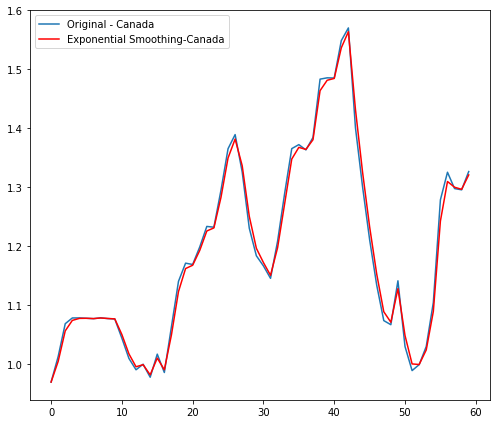

In [68]:
alpha=0.05
lags=100
canada = df['Canada']
canada_usd = np.log(canada)
canada_usd_100 = canada.head(100)
switzerland = df['Switzerland']
china = df['China']
al = .81;
ewma = canada.ewm(alpha=al, min_periods=0, adjust=False)
plt.figure(figsize=(7,6))
plt.plot(canada_usd_100, label='Original - Canada')
plt.plot(ewma.mean(), color='red', label='Exponential Smoothing-Canada')
plt.legend(loc='best')
plt.tight_layout()

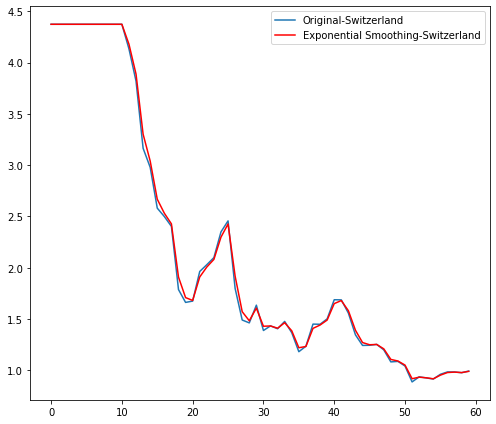

In [69]:
switzerland = df['Switzerland']
switzerland_usd = np.log(switzerland)
switzerland_usd_100 = switzerland.head(100)
china = df['China']
china_usd = np.log(china)
china_usd_100 = china.head(100)
ewma = switzerland.ewm(alpha=al, min_periods=0, adjust=False)
plt.figure(figsize=(7,6))
plt.plot(switzerland_usd_100, label='Original-Switzerland')
plt.plot(ewma.mean(), color='red', label='Exponential Smoothing-Switzerland')
plt.legend(loc='best')
plt.tight_layout()

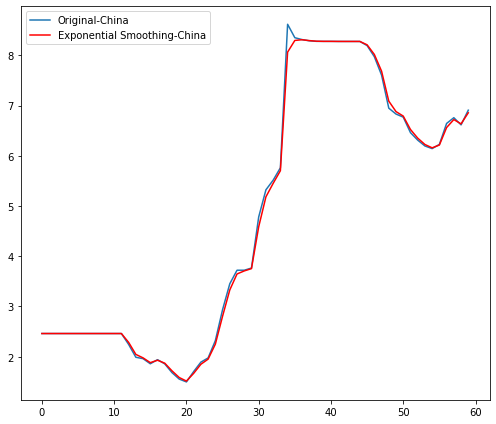

In [70]:
ewma = china.ewm(alpha=al, min_periods=0, adjust=False)
plt.figure(figsize=(7,6))
plt.plot(china_usd_100, label='Original-China')
plt.plot(ewma.mean(), color='red', label='Exponential Smoothing-China')
plt.legend(loc='best')
plt.tight_layout()

In [71]:
india = df['India']
india_usd = np.log(india)
india_usd_100 = india.head(100)
japan = df['Japan']
japan_usd = np.log(japan)
japan_usd_100 = japan.head(100)

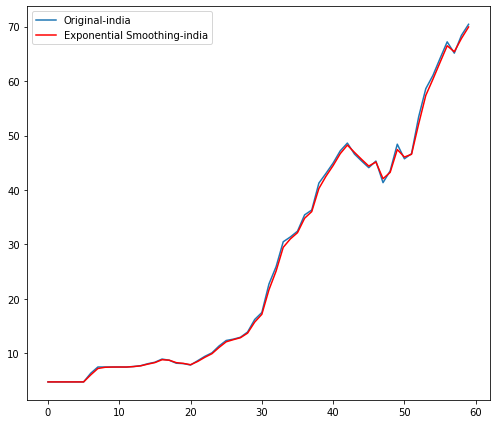

In [72]:
ewma = india.ewm(alpha=al, min_periods=0, adjust=False)
plt.figure(figsize=(7,6))
plt.plot(india_usd_100, label='Original-india')
plt.plot(ewma.mean(), color='red', label='Exponential Smoothing-india')
plt.legend(loc='best')
plt.tight_layout()

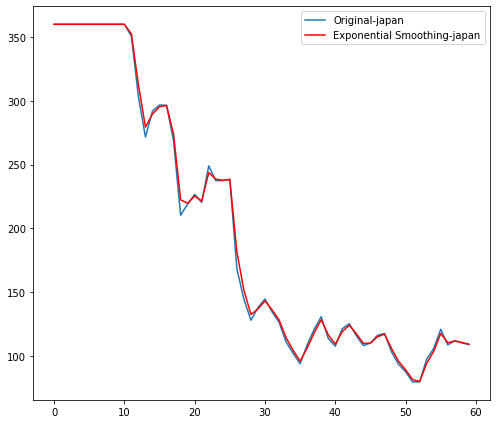

In [73]:
ewma = japan.ewm(alpha=al, min_periods=0, adjust=False)
plt.figure(figsize=(7,6))
plt.plot(japan_usd_100, label='Original-japan')
plt.plot(ewma.mean(), color='red', label='Exponential Smoothing-japan')
plt.legend(loc='best')
plt.tight_layout()

1.0 0.003375981084071445


Text(0.5, 1.0, 'Optimal Alpha Value for EWMA - Canada')

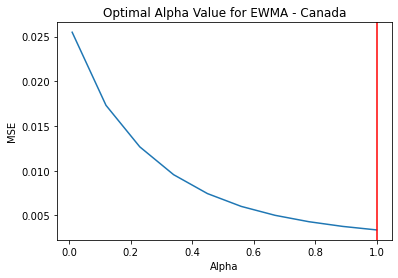

In [77]:
alpha = np.linspace(0.01,1,num=10)
err = [];
for al in alpha:
    ewma = canada.ewm(alpha=al, min_periods=0)
    pred = ewma.mean();
    diff = canada - pred.shift(1);
    err.append((diff ** 2).mean())
    
plt.plot(alpha, err)
optal = alpha[np.argmin(err)]
plt.axvline(x=optal, color='red')
print(optal, min(err))
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Optimal Alpha Value for EWMA - Canada')

1.0 0.037891761171806954


Text(0.5, 1.0, 'Optimal Alpha Value for EWMA - Switzerland')

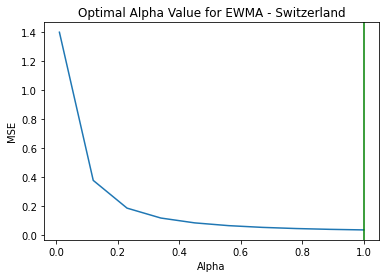

In [82]:
alpha = np.linspace(0.01,1,num=10)
err = [];
for al in alpha:
    ewma = switzerland.ewm(alpha=al, min_periods=0)
    pred = ewma.mean();
    diff = switzerland - pred.shift(1);
    err.append((diff ** 2).mean())
    
plt.plot(alpha, err)
optal = alpha[np.argmin(err)]
plt.axvline(x=optal, color='green')
print(optal, min(err))
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Optimal Alpha Value for EWMA - Switzerland')

1.0 0.20080085258435879


Text(0.5, 1.0, 'Optimal Alpha Value for EWMA')

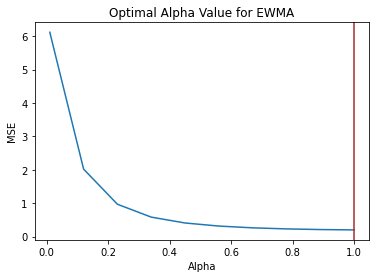

In [83]:
alpha = np.linspace(0.01,1,num=10)
err = [];
for al in alpha:
    ewma = china.ewm(alpha=al, min_periods=0)
    pred = ewma.mean();
    diff = china - pred.shift(1);
    err.append((diff ** 2).mean())
    
plt.plot(alpha, err)
optal = alpha[np.argmin(err)]
plt.axvline(x=optal, color='brown')
print(optal, min(err))
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Optimal Alpha Value for EWMA')

1.0 5.138592647921283


Text(0.5, 1.0, 'Optimal Alpha Value for EWMA - India')

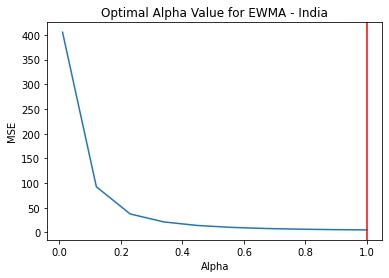

In [84]:
alpha = np.linspace(0.01,1,num=10)
err = [];
for al in alpha:
    ewma = india.ewm(alpha=al, min_periods=0)
    pred = ewma.mean();
    diff = india - pred.shift(1);
    err.append((diff ** 2).mean())
    
plt.plot(alpha, err)
optal = alpha[np.argmin(err)]
plt.axvline(x=optal, color='red')
print(optal, min(err))
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Optimal Alpha Value for EWMA - India')